In [82]:
#ヒートマップを作ります
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [83]:
result = pd.DataFrame()
for i in range(1,50):
    df = pd.read_excel('result/'+str(i)+'_predict_result.xlsx',index_col='Unnamed: 0')
    cordf = df.loc['test_correlation']
    newdf = pd.DataFrame(cordf)
    new_index = []
    for index in list(newdf.index):
        new_index.append(index.split('_')[0])
    newdf.index = new_index
    subject = [i]*21
    newdf['subject'] = subject
    newdf = newdf.reset_index()
    newdf = newdf.rename(columns={'index': 'label'})
    result = pd.concat([result,newdf])
result = result.reset_index()
result = result.drop('index',axis = 1)
result.head()

,label,test_correlation,subject
0,INTENSITY/STRENGTH,0.148315,1
1,VALENCE/PLEASANTNESS,0.242148,1
2,BAKERY,0.185699,1
3,SWEET,0.098524,1
4,FRUIT,0.195405,1


In [84]:
result = result.pivot("label", "subject", "test_correlation")
result['mean'] = result.mean(axis = 1)
result = result.sort_values('mean',ascending=False)
mean_values = result['mean']
result = result.drop('mean',axis = 1)
result.loc['mean'] = result.mean()
result = result.sort_values(by="mean",axis="columns",ascending = False)
result = result.drop('mean',axis = 0)
result.head()

subject,27,44,26,18,13,24,41,20,9,33,...,21,5,36,16,30,39,8,6,46,17
label,,,,,,,,,,,,,,,,,,,,,
INTENSITY/STRENGTH,0.291684,0.221204,0.216958,0.271349,0.215855,0.169069,0.277664,0.202483,0.354697,0.233646,...,0.208697,0.212144,0.207884,0.199641,0.228762,0.273228,0.153971,0.090274,0.180008,0.230303
SWEET,0.357129,0.288663,0.164266,0.289657,0.248954,0.266202,0.327494,0.350986,0.154422,0.283370,...,0.258737,0.098483,0.112051,0.130808,0.130571,0.247278,0.227925,-0.000014,0.080911,0.193234
VALENCE/PLEASANTNESS,0.243380,0.311732,0.117932,0.234514,0.225494,0.153971,0.211819,0.144855,0.256478,0.279357,...,0.239491,0.124668,0.192486,0.120899,0.150825,0.045318,0.171241,-0.013815,0.186463,0.099242
BAKERY,0.427456,0.384068,0.231049,0.208296,0.131333,0.347893,0.277265,0.041249,0.112491,0.281957,...,0.274059,0.110182,-0.013660,0.064211,0.022320,0.165610,-0.022182,0.423777,0.005500,NaN
GARLIC,0.098800,0.420484,0.300434,0.186784,0.208640,0.301469,0.413221,0.664079,0.410803,0.263045,...,-0.022537,0.339702,NaN,0.014667,-0.011326,-0.008053,0.282034,-0.011347,0.050630,0.194576


In [85]:
sort_value = list(result.columns)

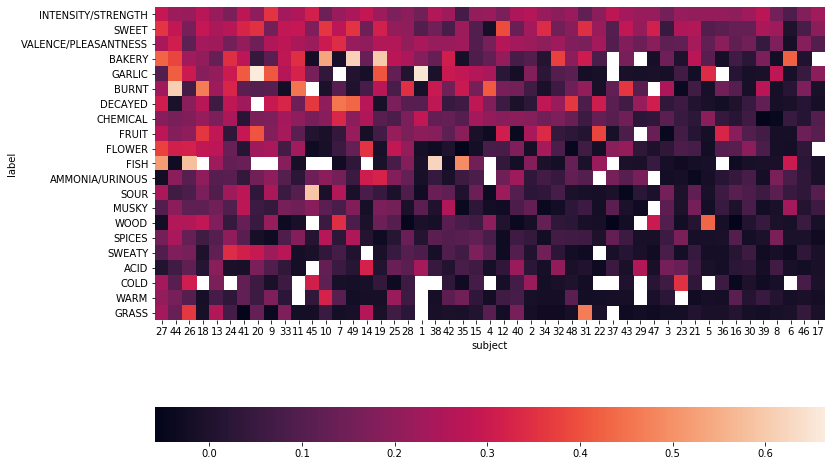

In [86]:
grid_kws = {"height_ratios": (.9, .1), "hspace": .5}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws,figsize=(12,8))
heatmap = sns.heatmap(result, ax=ax,
                      cbar_ax=cbar_ax,
                      cbar_kws={"orientation": "horizontal"},
                      xticklabels = 1,
                      yticklabels = 1
                     )
plt.savefig('seaborn_heatmap_big.png')

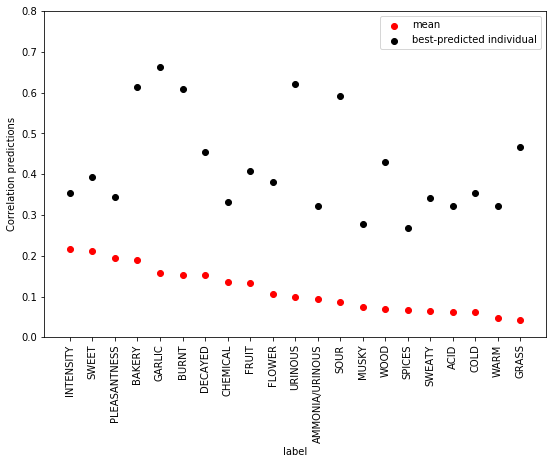

In [87]:
rindex = list(result.index)
rindex[0] = 'INTENSITY'
rindex[2] = 'PLEASANTNESS'
rindex[10] = 'URINOUS'
max_values = result.max(axis = 1)

fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(1,1,1)
plt.xticks(rotation=90)
ax1.scatter(rindex,mean_values,label='mean', color='red')
ax1.scatter(rindex,max_values,label='best-predicted individual', color='black')
ax1.set_xlabel('label')
ax1.set_ylim([0,0.8])
ax1.set_ylabel('Correlation predictions')
ax1.legend()
plt.savefig('scatter.png')

In [15]:
def make_bar(subject,index,label):
    df = pd.read_excel('result/'+str(subject)+'_predict_result.xlsx',index_col='Unnamed: 0')
    columns = list(df.columns)
    value = df.loc[index]
    new_columns = []
    for column in columns:
        new_columns.append(column.split('_')[0])
    plt.figure(figsize=(12,8))
    plt.xticks(rotation=90)
    plt.bar(new_columns,value)
    plt.xlabel('label')
    plt.ylabel(label)
    plt.savefig('bar'+str(subject)+label+'.png')
    return plt

<module 'matplotlib.pyplot' from '/Users/Haruki/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/matplotlib/pyplot.py'>

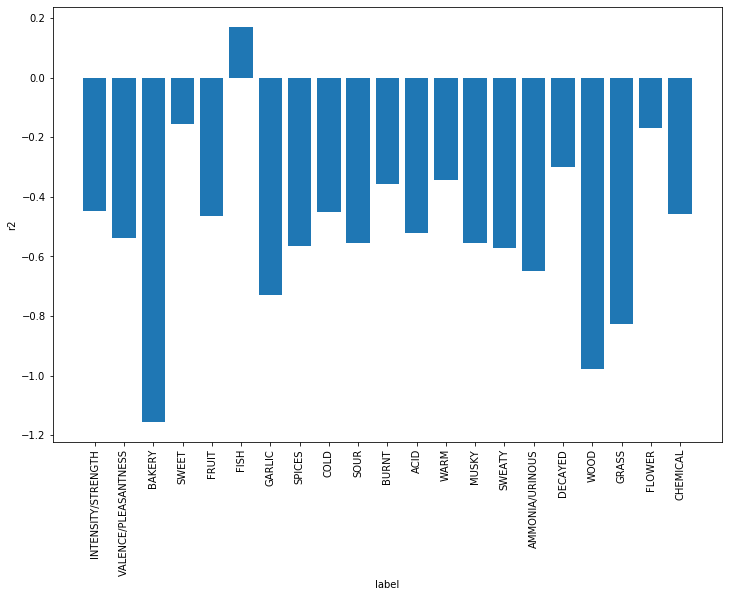

In [16]:
make_bar(27,'test_R2','r2')

<module 'matplotlib.pyplot' from '/Users/Haruki/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/matplotlib/pyplot.py'>

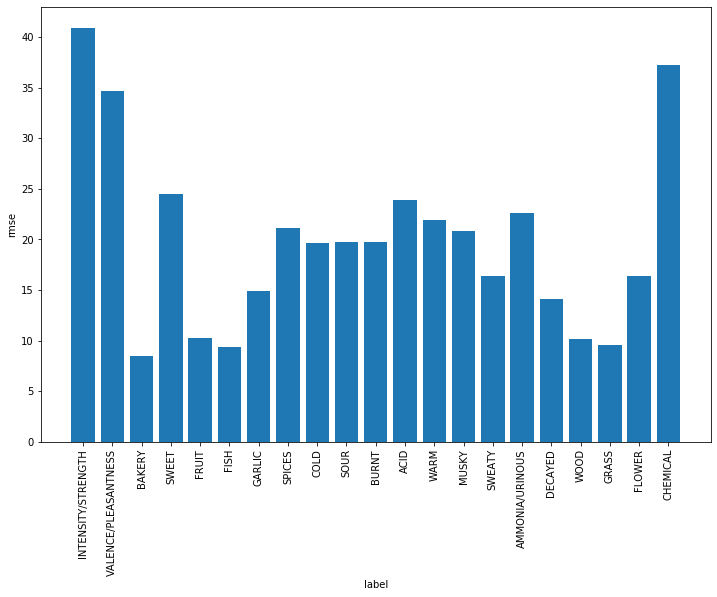

In [17]:
make_bar(27,'test_rmse','rmse')

<module 'matplotlib.pyplot' from '/Users/Haruki/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/matplotlib/pyplot.py'>

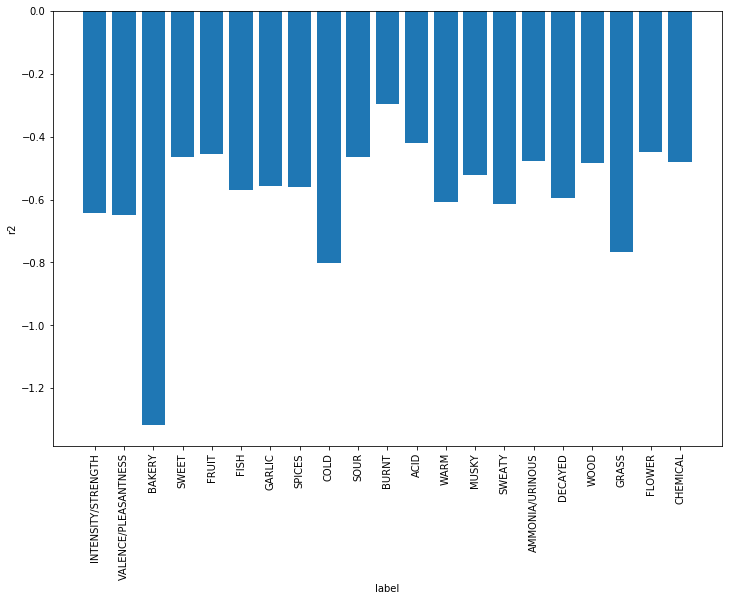

In [18]:
make_bar(46,'test_R2','r2')

<module 'matplotlib.pyplot' from '/Users/Haruki/anaconda3/envs/my-rdkit-env/lib/python3.6/site-packages/matplotlib/pyplot.py'>


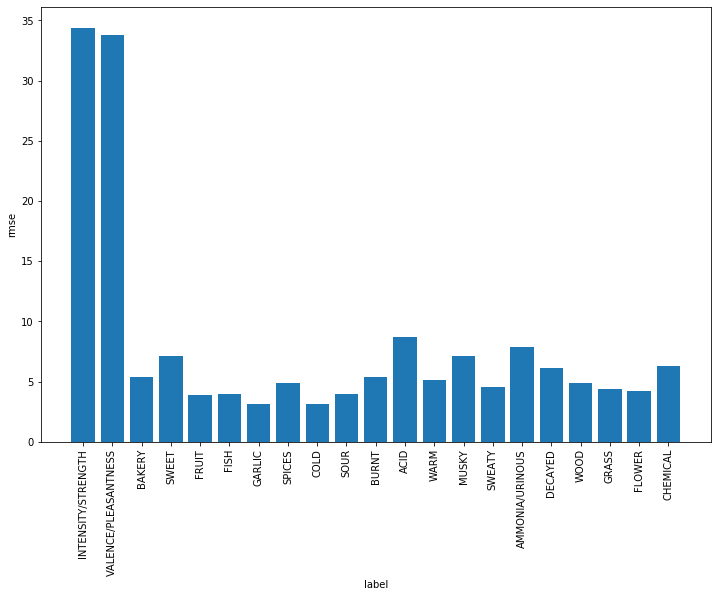

In [101]:
print(make_bar(46,'test_rmse','rmse'))

In [194]:
len(sort_value)

49

In [195]:
class_data = {1:[25,41,28,13,33,31,29,11,32,16,6,10,38],
 2:[2,19,15,12,8,43,36,24,17,42,49,5,45,34,20,47,23,46,37],
 3:[21,7,14,48,40,3,27,18,1,44,30,26,39,22,35,9,4]
}

In [196]:
classes = []
for v in sort_value:
    for i in class_data:
        if v in class_data[i]:
            classes.append(i)

In [197]:
len(classes)

49

In [205]:
a=pd.DataFrame([sort_value,classes])
a.to_excel('data/bunsan2.xlsx')

In [19]:
result

subject,27,44,26,18,13,24,41,20,9,33,...,21,5,36,16,30,39,8,6,46,17
label,,,,,,,,,,,,,,,,,,,,,
INTENSITY/STRENGTH,0.291684,0.221204,0.216958,0.271349,0.215855,0.169069,0.277664,0.202483,0.354697,0.233646,...,0.208697,0.212144,0.207884,0.199641,0.228762,0.273228,0.153971,0.090274,0.180008,0.230303
SWEET,0.357129,0.288663,0.164266,0.289657,0.248954,0.266202,0.327494,0.350986,0.154422,0.283370,...,0.258737,0.098483,0.112051,0.130808,0.130571,0.247278,0.227925,-0.000014,0.080911,0.193234
VALENCE/PLEASANTNESS,0.243380,0.311732,0.117932,0.234514,0.225494,0.153971,0.211819,0.144855,0.256478,0.279357,...,0.239491,0.124668,0.192486,0.120899,0.150825,0.045318,0.171241,-0.013815,0.186463,0.099242
BAKERY,0.427456,0.384068,0.231049,0.208296,0.131333,0.347893,0.277265,0.041249,0.112491,0.281957,...,0.274059,0.110182,-0.013660,0.064211,0.022320,0.165610,-0.022182,0.423777,0.005500,NaN
GARLIC,0.098800,0.420484,0.300434,0.186784,0.208640,0.301469,0.413221,0.664079,0.410803,0.263045,...,-0.022537,0.339702,NaN,0.014667,-0.011326,-0.008053,0.282034,-0.011347,0.050630,0.194576
BURNT,0.225889,0.609581,0.070325,0.466717,0.228361,0.330088,0.114183,0.101521,0.110043,-0.024466,...,0.063005,-0.011404,0.151383,0.104076,-0.010840,0.269482,-0.015976,0.020116,0.172465,-0.007728
DECAYED,0.309494,-0.005628,0.191547,0.271238,0.062619,0.281103,0.226189,NaN,0.294640,0.329741,...,0.008213,-0.009917,-0.021970,-0.001344,0.050265,0.123091,-0.015927,-0.009916,0.012479,-0.016058
CHEMICAL,0.187349,0.159130,0.177761,0.214994,0.165077,0.244608,0.018088,0.169411,0.172903,0.233235,...,0.028661,0.191032,0.040488,0.019966,0.060379,-0.053226,-0.042310,0.049170,0.013142,0.096081
FRUIT,0.275327,0.182088,0.200784,0.360665,0.285009,0.032293,0.291012,0.406711,0.182258,0.240168,...,0.012419,-0.016038,0.328638,0.187513,0.096290,0.069324,-0.014295,-0.014410,0.141019,0.106013


In [76]:
data = []
for i in range(len(result)):
    V = list(result.iloc[i].values)
    new = []
    for v in V:
        if not np.isnan(v):
            new.append(v)
    data.append(new)

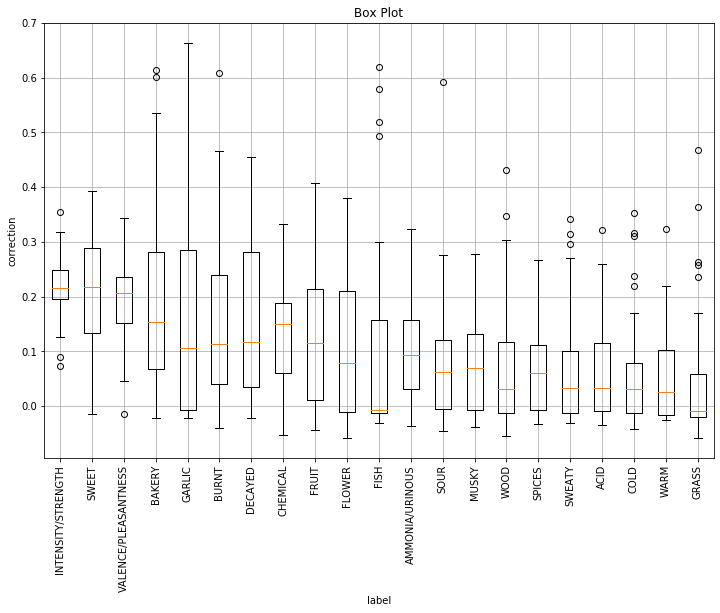

<Figure size 432x288 with 0 Axes>

In [81]:
fig, ax = plt.subplots(figsize=(12,8))    
points = (data)
bp = ax.boxplot(points)
ax.set_xticklabels(list(result.index))
# タイトル名
plt.title('Box Plot')
# ラベル名
plt.xticks(rotation=90)
plt.xlabel('label')
plt.ylabel('correction')
plt.grid()
plt.show()
plt.savefig('box.png')

In [88]:
import pickle
import pandas as pd
import numpy as np
import math

import pubchempy as pcp
from rdkit.Chem import AllChem
from rdkit import Chem

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error,median_absolute_error

from sklearn.metrics import make_scorer

import openpyxl

In [120]:
#pubchemからsmilesを取ってきてECFPのファイルを作成する
def make_compound_dic(df):
    id_list = df['Compound Identifier'].unique().tolist()
    properties = ['IUPACName', 'MolecularFormula', 'MolecularWeight', 'XLogP', 'TPSA', 'CanonicalSMILES']
    #get informations from pubChem
    chem_infos = []
    for cid in id_list:
        chem_info = pcp.get_properties(properties,cid)
        chem_infos.append(chem_info)

    #ECFP4
    radius = 2
    nBits = 4096
    morgan_fp = []
    for info_list in chem_infos:
        info = info_list[0]
        mol = Chem.MolFromSmiles(info['CanonicalSMILES'])
        fp = [i for i in AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits)]
        morgan_fp.append(fp)
    morgan_fp = np.array(morgan_fp)

    compound_dic = {}
    i = 0
    for info_list in chem_infos:
        info = info_list[0]
        compound_dic[info['CID']] = morgan_fp[i]
        i += 1
    
    with open('data/compound_dic.pickle',mode='wb') as f:
        pickle.dump(compound_dic,f)
        

def rmse_score(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    return rmse

def correlation_coeffcient(y_true, y_pred):
    correlation = np.corrcoef(list(y_true), list(y_pred))
    return correlation[0,1]

def show_cor(y_true, y_pred):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(y_true, y_pred)
    ax.set_title('correration')
    ax.set_xlabel('true')
    ax.set_ylabel('pred')
    plt.savefig('cor.png')
    print(len(y_pred))
    return 0
    
             
def str2int(s):
    if s == 'NaN':
        return 0
    else:
        return int(s)

def value2onehot(v):
    if v == 0:
        return 0
    else:
        return 1

def make_data(df,person,label,compound_dic):
    
    #使わないcolumnを削除
    df = df.drop('Odor', axis=1)
    df = df.drop('Replicate', axis=1)
    df = df.drop('Dilution', axis=1)

    #被験者を絞り込む処理
    sdf = df[df["subject #"]==str(person)].reset_index()
    sdf = sdf.drop('subject #', axis=1)
    sdf = sdf.drop('index', axis=1)
    sdf['Intensity'] = sdf['Intensity'].map({'low ':0,'high ':1})

    #int型に変換
    sdf['INTENSITY/STRENGTH'] = sdf['INTENSITY/STRENGTH'].apply(str2int)
    sdf['VALENCE/PLEASANTNESS'] = sdf['VALENCE/PLEASANTNESS'].apply(str2int)

    #説明変数とラベルデータを分離させる
    X = sdf.iloc[:,0:2]
    #print(X)
    Ys = sdf.iloc[:,2:]
    #print(Ys)

    #ECFP辞書検索
    ecfps = []
    for index in range(len(sdf)):
        data = sdf.loc[index]
        cid = int(data["Compound Identifier"])
        ecfps.append(list(compound_dic[cid]))
    
    #featureごとに列追加
    numOfColumn = len(ecfps[0])
    for c in range(numOfColumn):
        new = []
        for i in range(len(ecfps)):
            new.append(ecfps[i][c])
        X['f'+str(c)] = new
    
    #不要columnを削除
    X = X.drop('Compound Identifier', axis=1)

    #ラベルのset
    Y = Ys[label]
    Y = Y.apply(str2int)
    
    return X,Y,Ys


#モデルの評価関数 
def evaluate(clf,X,Y,k,label,make_df = 1):
    score_funcs = {
        'correlation':make_scorer(correlation_coeffcient),
        'rmse': make_scorer(rmse_score),
        'graph': make_scorer(show_cor)
        #'MedAE':'neg_median_absolute_error',
        #'R2':'r2',
        #'MAE':'neg_mean_absolute_error'
    }
    
    kf=KFold(n_splits=k, shuffle=True, random_state=0)
    score=cross_validate(clf, X, Y, cv = kf,
                        scoring=score_funcs)
                        #,return_train_score=True)
    df = pd.DataFrame(score)
    df.loc[label+"_mean"]=df.mean()
    return df

In [121]:
#trainDataの読み込み
train_set = []
with open('data/TrainSet.txt') as file:
    for f in file:
        line = f.split('\t')
        line[-1] = line[-1].split('\n')[0]
        train_set.append(line)
        
df = pd.DataFrame(train_set[1:],columns = train_set[0])

#make_compound_dic(df)

#化合物データの読み込み
with open('data/compound_dic.pickle','rb') as f:
    compound_dic = pickle.load(f)

labels = list(df.iloc[:,6:].columns)
labels 

['INTENSITY/STRENGTH',
 'VALENCE/PLEASANTNESS',
 'BAKERY',
 'SWEET',
 'FRUIT',
 'FISH',
 'GARLIC',
 'SPICES',
 'COLD',
 'SOUR',
 'BURNT',
 'ACID',
 'WARM',
 'MUSKY',
 'SWEATY',
 'AMMONIA/URINOUS',
 'DECAYED',
 'WOOD',
 'GRASS',
 'FLOWER',
 'CHEMICAL']

In [122]:
Y.value_counts()

0      179
76      33
100     23
1       20
60      18
      ... 
50       1
99       1
87       1
69       1
96       1
Name: INTENSITY/STRENGTH, Length: 87, dtype: int64

144
143
143
143
143


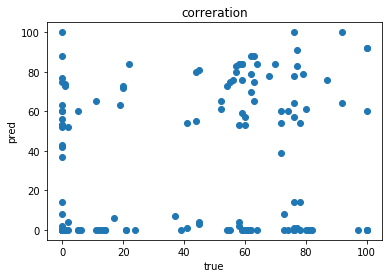

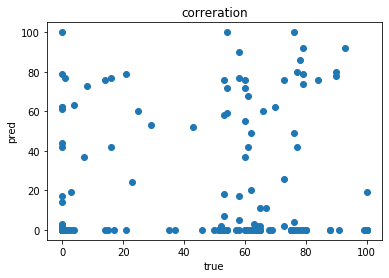

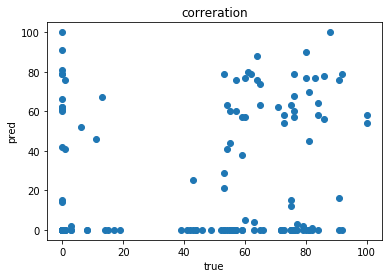

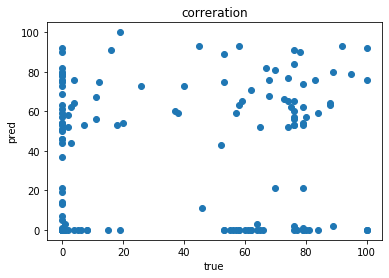

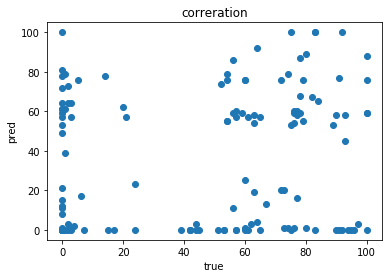

In [126]:
person = 9
label = 'INTENSITY/STRENGTH'
X,Y,ori= make_data(df,1,label,compound_dic)
vc = Y.value_counts()
clf = RandomForestClassifier(n_estimators=100,max_features='auto',oob_score=False,n_jobs=1,random_state=0)
evaluate_df = evaluate(clf,X,Y,5,label)

In [124]:
evaluate_df

,fit_time,score_time,test_correlation,test_rmse,test_graph
0,2.273011,0.102400,0.206513,44.275652,0.0
1,2.295322,0.105224,0.105525,48.194173,0.0
2,2.162133,0.106720,0.122387,47.261806,0.0
3,2.232577,0.092261,0.082024,47.225689,0.0
4,2.204048,0.110659,0.225127,44.571621,0.0
INTENSITY/STRENGTH_mean,2.233418,0.103453,0.148315,46.305788,0.0


In [ ]:
pdf = pd.read_excel('result/9_predict_result.xlsx',index_col='Unnamed: 0')

In [ ]:
pdf

In [131]:
pd.set_option('display.max_columns', 100)

In [132]:
pd.DataFrame(vc)

,INTENSITY/STRENGTH
0,179
76,33
100,23
1,20
60,18
...,...
50,1
99,1
87,1
69,1


In [133]:
vc.sum()

716